# Project 2020 - Fundamentals of Data Analysis
This project performs and explains simple linear regression using the Python programming language. Using the *powerproduction* dataset, it sets out to accurately predict wind turbine power output from wind speed values

***

<br>



## Introduction

***

This project has two distinct but related aims:

* To perform and explain simple linear regression using the Python programming language on the *powerproduction data set*;
* To accurately predict wind turbine power from wind speed values. <br>

In the process of explaining and performing simple linear regression on the data set, it is evident that it is not the regression model which most accurately predicts turbine power output. As a result, polynomial regression is used to build a more accurate predictive model. 

Throughout the project, the following *data preparation* and *model evaluation* topics are covered:
* Outliers;
* Train-test split procedure;
* R-squared value;

<br>



## 1. Data overview

***

#### 1.1 Module imports

First, the necessary modules and packages are imported:

* `numpy` is a python library which allows us to work with arrays, more suited to data analysis than traditional python `lists` [1] 
* `pandas` is suited to working with data sets and provides the DataFrame structure to make this more effective and efficient [2]. 
* `matplotlib.pyplot` is used for visualisation. It is a graph plotting library on which many visualisation packages are built in python. The `pyplot` submodule contains most of matplotlib's utilities [3]

The plot style and size is also set with the appropriate parameters

In [28]:
# For arrays
import numpy as np

# For dataframes
import pandas as pd

# For plotting
import matplotlib.pyplot as plt


import seaborn as sns
from sklearn.linear_model import LinearRegression

In [29]:
# Plot style
plt.style.use('ggplot')

# Plot size
plt.rcParams['figure.figsize'] = [11, 6]

<br>



Read in powerproduction.csv  

In [3]:
pp = pd.read_csv("powerproduction.csv")
pp.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


<br>



The describe() method gives us a summary overview of the dataset, including the mean, standard deviation and quartile distribution of both variables

In [4]:
pp.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


<br>



#### 1.2 Visualisation and preliminary analysis

Next, the variables are plotted on a scatterplot. Scatterplots allows us to visualise the relationship between two variables in a dataset. Through visualisation, we can get a preliminary indication as to what predictive model might be best suited. This can be inferred from the shape of the relationship between the variables. It can also give us additional information, such as the presence of outliers.

Text(0, 0.5, 'power (kW)')

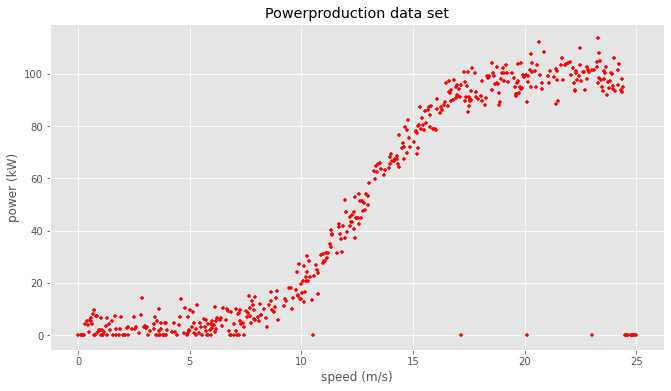

In [30]:
# Generate scatter plot of speed and power data points
plt.scatter(pp.speed,pp.power,color='red',marker='+', s=10)

plt.title('Powerproduction data set')
plt.xlabel('speed (m/s)')
plt.ylabel('power (kW)')

We can see clearly that there is a strong relationship between both variables. It is important to establish a relationship *before* attempting to fit a linear model to observed data [1]. Often, as above, this can be see through data visualisation. However we can also use statistical methods to determine the relationship. A commonly used numerical measure in this regard is the *correlation coefficient*, which quantifies the association between two variables [2]. Also known as the *r* value, this will be examined in greater detail below.

##### Wind Turbine Power Curve
Looking more closely at the plot, we see that it produces a visualisation of the typical wind turbine power curve. The *cut-in* wind speed is at ~7m/s, below which the turbine is producing hardly any power. Between speeds of ~7 and ~17m/s the power ramps up to what is known as the *rated power capacity*. From speeds of ~17m/s the power generated remains more or less constant, right up to ~25m/s, or the *cut-out* wind speed. While there is much potential power in the wind speed above the cut-out speed, the cost of making the turbine capable of producing power under these conditions outweights the benefits of more power being generated [3]. <br>

##### Outliers
What is also notable from the plot is the presence of seeming outliers in the data. Broadly speaking, an outlier is a data point that is extremely high or extremely low [4]. They can impact the performace of a predictive model, misrepresenting the the data used to train and test the model. There are a number of observations where no power (0kW) is being generated despite sufficiently high wind speeds. We will take a closer look at these outliers below. 

##### Predictive model
From initial visualisation, we may deduce that a line (or curve) would closely fit the data. This implies that a linear regression model could be used to make power output predictions. As specified in the project brief, simple linear regression will be explained and performed on the *powerproduction* data set. A simple linear regression model has only one *predictor* i.e. a single independent variable (the *speed* variable in the context of the current project). It involves fitting a straight line to the data. However a curved line may yield more accurate results. This will also be exaimed further below.

<br>

##### end section

<br>



## 2. Simple linear regression

***

#### 2.1 Regression Analysis

Regression analysis is a statistical method which describes the relationship between a *dependent* variable and one or more *independent* variables [1]. It can be used to infer the nature of the relationship and consequently, can enable us to make predictions based on a known independent variable or establish causation relationships between variables. In machine learning, it is used primarily to build predictive models [2] and it is this use which will be investigated below.
<br>


##### Simple linear regression
There are numerous types of regression analysis and choosing the most appropriate one depends on various factors, such as the nature of the data, the information the researcher is seeking to extract among others [3]. A simple linear regression model is applied to a *bivariate* data set - where one of the variables is the *predictor*, or independent variable and the other is known as the *response*, or dependent variable. The *powerproduction* data set meets this criterion with *wind speed* the predictor and *power output* the response. 

#### 2.2 Correlation coefficient

As we saw above on the plot, there is visible positive relationship between speed and power in the data set. We can measure the *strength* of this relationship by calculating the correlation coefficient (also known as the *Pearson's correlation coefficient*) [4]. Using a statistical method to quantify the relationship strength makes our visual interpretation more robust. The mathematical formula is commonly expressed as [5]:

$$r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}$$

Below, I use `numpy.corrcoef()` to generate a correlation coefficient matrix between *speed* and *power*. I slice the resulting array to get the correlation coefficient. I use code found on kite.com [6]

In [6]:
# Generate correlation matrix
correlation_matrix = np.corrcoef(pp.speed, pp.power)

# Slice array to get correlation coefficient
correlation_xy = correlation_matrix[0, 1]

# Print value to screen
print('Correlation coefficient: ', correlation_xy)

Correlation coefficient:  0.8537775037188597


A value of 0.85 indicates a strong, positive relationship between speed and power: "Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered **highly correlated**." [7] 

<br>

#### 2.3 Best fitting line
The next step in building our simple linear regression model is to determine the best fitting line for the data. As with the *correlation coefficient* above, we can visualise the data and approximate a line which best captures the data. `numpy.polyfit()` uses a more robust, mathematical method to determine the line of best fit. This is called the *ordinary least squares method*. It is among the "... most commonly used estimation methods for linear regression" [8] can be expressed mathematically as: <br> $$\Sigma_i(y_i - mx_i - c)$$ <br>

where $m$ = the slope and $c$ = the y-intercept. The least squares method calculates the error between all the observed y values in the data set and the predicted y values. `polyfit()` returns the values for the coefficients $m$ and $c$ which minimize the result of the least squares method. Below, I pass the speed and power variables to the function. The third parameter is the degree of the fitting polynomial [9]. For simple linear regression, this will be 1 as a straight line is a first degree polynomial, expressed as $y = mx + c$:

In [7]:
# Call polyfit passing speed and power as parameters
coeffs = np.polyfit(pp.speed, pp.power, deg=1)

# Output polynomial coefficients (slope and y-intercept)
coeffs

array([  4.91759567, -13.89990263])

We can now plot the best fitting line over the data for visualisation. The polynomial coefficients represent the $m$ and $c$ values to generate the line:

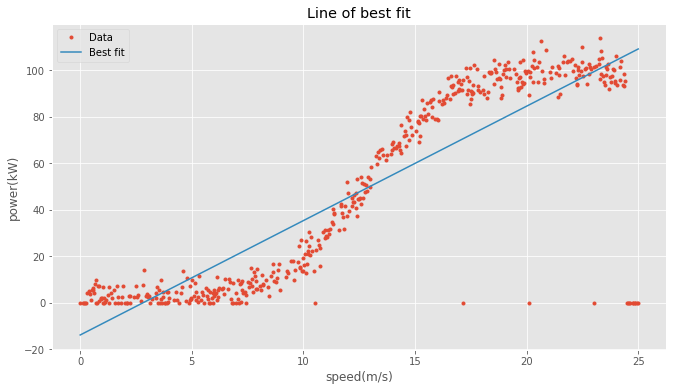

In [8]:
# Plot data
plt.plot(pp.speed, pp.power, '.', label="Data")

# Plot best fitting line
plt.plot(pp.speed, coeffs[0] * pp.speed + coeffs[1], '-', label='Best fit')

plt.title('Line of best fit')
plt.xlabel('speed(m/s)')
plt.ylabel('power(kW)')
plt.legend();

It is clear from this plot that the regression line does not fully capture all of the data. It over- and under-predicts at various points.

<br>



#### 2.4 Making predictions with the model

Given that we now have values for the slope and intercept, we can plug speed values into the equation to predict corresponding values for power:

In [9]:
# Slope
m = 4.91759567

# Intercept
c = -13.89990263

# Pick arbitrary value for wind speed
x = 16.5

# Equation of fitted line
y = m*x + c

# Print value for y
print('Predicted power value: ', y)

Predicted power value:  67.240425925


The model predicts that power output for a wind speed of 16.5m/s would be ~67.24kW. If we check these values on our plot against the observed data, we can see that the power output of speeds of ~16.5m/s according to the observed data would be quite a bit higher. 

We can use `numpy`'s inbuilt `poly1d()` function to perform this same calculation [10]:

In [72]:
# Pass coeffs to the poly1d function
predict = np.poly1d(coeffs)
wind_speed = 16.5

# Output predicted power 
predict(wind_speed)

67.24042584865744

<br>



#### 2.5 Model accuracy: R-squared

There are various statistical methods we can use to calculate the accuracy of our model e.g. *MSE (mean squared error)*, *MAE (mean absolute error)*, *RMSE (root mean squared error)*. Below I will use the *R-squared* method. This is also known as the *coefficient of determination* [11]. We use R-squared to quantify how well the line fits the data. In this regard, we can say that it is a "goodness of fit" measurement [12]. The formula for R-squared can be expressed as follows: 
<br>

$$ r^2 = 1 - \frac{\sum(y_i - \hat{y})^2}{\sum(y_i - \bar{y})^2}$$ 

<br>

where $\hat{y}$ = the predicted value of $y$ and $\bar{y}$ = the mean value of $y$ [13]. The R-squared value will always be between 0 and 1 and therefore can be expressed as a percentage. With this in mind, R-squared can be understood as the percentage of variation in the dependent variable that is explained by the variation in the independent variable. Generally speaking, the higher the R-squared value, the better the model fits the observed data. 

*It is worth pointing out that a high R-squared value does not always necessarily indicate a well-performing model e.g. in the case of overfitting a line to the data* [14].

<br>

##### Calculating R-squared
R-squared is simply the correlation coefficient (or *R* value) squared. We calculated the R value above. Squaring this value, we get the R-squared value:

In [11]:
# Square the correlation coefficient
r_2 = correlation_xy**2

print('R-squared =', r_2)

R-squared = 0.7289360258564076


~73% of the *total* variation in power output is explained by wind speed when we use our model to predict power output. 

<br>



Given that the R-squared value is an measure of the accuracy of a model, I will next make some adjustments to try to increase it. First of all, let us take a look at the outliers in the data set.

<br>

#### 2.6 Outliers
As noted above, the presence of outliers can result in a misrepresenation of the data when used to train a model. In linear regression models, it can have the effect of pulling the line towards them. It is not difficult to see how this may happen when we consider the *ordinary least squares* method (described above) used to calculate the best fitting line. From out plot we can see that there are a number of observations which might be considered outliers. We can use a statistical method as a more robust way of detecting outliers.

##### Mahalonibis Distance

In researching outlier detection, much of the online resources appear to deal with *univariate* outliers [15], [16]. Additionally, detection tools available as part of the `scikit-learn` library e.g. `LocalOutlierFactor`, (which uses the nearest neighbours algorithm to detect outliers in a sample) were not suited to the current project. For *multivariate* outliers, a common statistical method of dection is the *Mahalonibis Distance* measure, which is "... widely used distance metric for the detection of multivariate outliers..." [17]. Indeed it has been applied to wind turbine curve modeling by a number of studies (e.g. Pei and Li, 2019) [18]. 

The code for the function below was found on an informative blog post [19] and applies Mahalonibis Distance to the data set to detect outliers. It returns a list of index values for the rows containing outliers as detected by the method. I locate these rows using the `pandas.loc` method and remove them from the data set:

In [12]:
import scipy as sp
from scipy.stats import chi2
from sklearn.covariance import MinCovDet

# Set variable df to equal pp data set
df = pp

#Robust Mahalonibis Distance
def robust_mahalanobis_method(df):
    #Minimum covariance determinant
    rng = np.random.RandomState(0)
    real_cov = np.cov(df.values.T)
    X = rng.multivariate_normal(mean=np.mean(df, axis=0), cov=real_cov, size=506)
    cov = MinCovDet(random_state=0).fit(X)
    mcd = cov.covariance_ #robust covariance metric
    robust_mean = cov.location_  #robust mean
    inv_covmat = sp.linalg.inv(mcd) #inverse covariance metric
    
    #Robust M-Distance
    x_minus_mu = df - robust_mean
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    
    #Flag as outlier
    outlier = []
    C = np.sqrt(chi2.ppf((1-0.001), df=df.shape[1]))#degrees of freedom = number of variables
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md

outliers_mahal_rob, md_rb = robust_mahalanobis_method(df=df)

In [13]:
# Find rows containing outlier indices
pp_outliers = pp.loc[ outliers_mahal_rob , : ]

# Output dataframe of outliers
pp_outliers

,speed,power
340,17.167,0.0
404,20.095,0.0
456,22.998,0.0
490,24.499,0.0
491,24.525,0.0
492,24.575,0.0
493,24.650,0.0
494,24.750,0.0
495,24.775,0.0
496,24.850,0.0


##### Outlier removal

Above is the data frame containing the outlier observations. All the outliers detected have a power value of 0kW. This is what was observed in the scatterplot. Below, I remove them from the data set, creating an updated data set `pp_updated` in the process:

In [51]:
# Remove outliers from data set
pp_updated = pp.drop(outliers_mahal_rob)

In [52]:
# Output statistical summary of updated data frame
pp_updated.describe()

,speed,power
count,487.000000,487.000000
mean,12.294641,49.296287
std,7.077215,41.409933
min,0.000000,0.000000
25%,6.143500,5.769000
50%,12.337000,44.745000
75%,18.380500,93.733500
max,24.399000,113.556000


Text(0, 0.5, 'power (kW)')

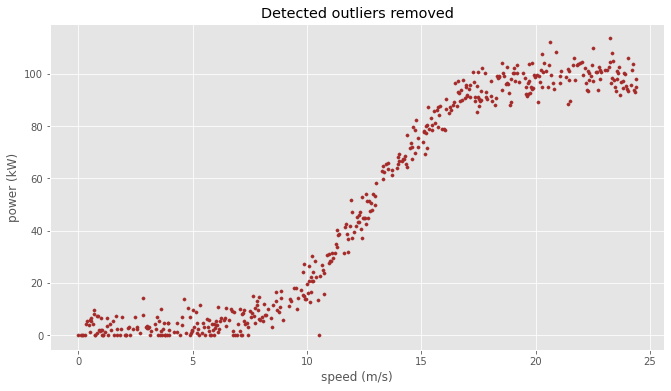

In [53]:
# Plot data with detected outliers removed
plt.scatter(pp_updated['speed'], pp_updated['power'], color='brown', marker='o', s=10)

plt.title('Detected outliers removed')
plt.xlabel('speed (m/s)')
plt.ylabel('power (kW)')

The Mahalonibis Distance function detected all but one outlier. I will remove this too for improved performance. Firstly, we view the last 5 observations with power = 0kW:

In [56]:
# Data set containing only power=0 values
pp_zero = pp_updated.loc[pp_updated['power'] == 0]

# Output last 5 rows
pp_zero.tail()

,speed,power
135,6.857,0.0
136,6.957,0.0
140,7.107,0.0
149,7.432,0.0
208,10.511,0.0


We can see that the outlier is at index 208. This can be removed with the following code:

In [57]:
# Updated dataframe with all outliers removed
pp_clean = pp_updated.drop([208])

Text(0, 0.5, 'power (kW)')

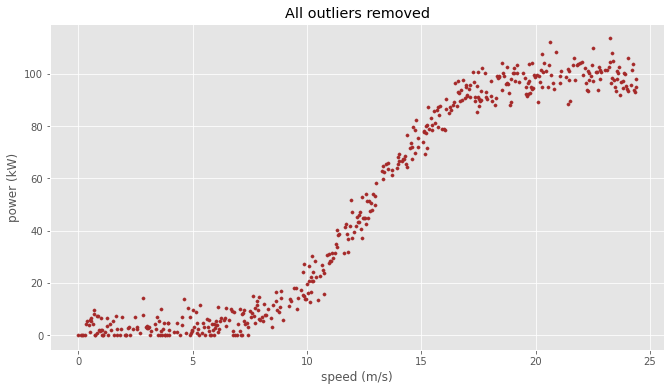

In [58]:
# Plot data with all outliers removed
plt.scatter(pp_clean['speed'], pp_clean['power'], color='brown', marker='o', s=10)

plt.title('All outliers removed')
plt.xlabel('speed (m/s)')
plt.ylabel('power (kW)')

##### Model after outlier removal

Now, let us build a simple linear regression model with outliers removed from the data set to see how this adjustment affects the performance of the model:

In [89]:
# Call polyfit passing speed and power as parameters
coeffs2 = np.polyfit(pp_clean.speed, pp_clean.power, 1)

# Output polynomial coefficients (slope and y-intercept)
coeffs2

array([  5.5509909 , -18.87009061])

We can see immediately that the slope and intercept of the line of best fit have changed. Using `poly1d()` once more let us use the new model to make predictions:

In [91]:
# Pass coeffs to the poly1d function
predict2 = np.poly1d(coeffs2)

# Output predicted power values
predict2(pp_clean.speed)

array([-1.88700906e+01, -1.81762167e+01, -1.80374420e+01, -1.76211177e+01,
       -1.73435681e+01, -1.70660186e+01, -1.66496942e+01, -1.63721447e+01,
       -1.60890442e+01, -1.59502694e+01, -1.58114946e+01, -1.56727198e+01,
       -1.53951703e+01, -1.51176208e+01, -1.49788460e+01, -1.48400712e+01,
       -1.47012964e+01, -1.44237469e+01, -1.42849721e+01, -1.41461974e+01,
       -1.37298730e+01, -1.35910983e+01, -1.34523235e+01, -1.33135487e+01,
       -1.31747739e+01, -1.30359992e+01, -1.28972244e+01, -1.27584496e+01,
       -1.24809001e+01, -1.19258010e+01, -1.17870262e+01, -1.16482514e+01,
       -1.10931524e+01, -1.09543776e+01, -1.05325023e+01, -1.02549527e+01,
       -9.69985364e+00, -9.56107887e+00, -9.42230410e+00, -8.72843023e+00,
       -8.45088069e+00, -8.31210592e+00, -7.61823205e+00, -7.34068251e+00,
       -7.20190774e+00, -6.78558342e+00, -6.50803387e+00, -6.36925910e+00,
       -5.53661047e+00, -5.12028615e+00, -4.69841084e+00, -4.55963607e+00,
       -3.86576221e+00, -

Taking a look at the array of predicted values we see that our model predicts some negative values for power output. It is clear how this is happening when we visualise these predictions. Below, I plot both lines over a scatter plot of the data. The code for this plot was taken from the course notes for this module (Fundamentals of Data Analysis) [20]

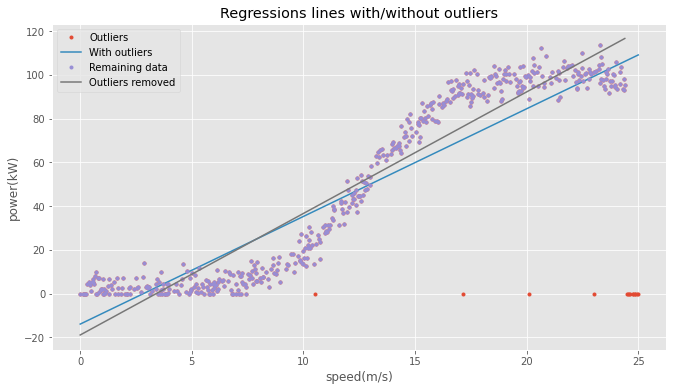

In [21]:
# Plot both lines on one plot.
plt.plot(pp.speed, pp.power, '.', label="Outliers")
plt.plot(pp.speed, coeffs[0] * pp.speed + coeffs[1], '-', label='With outliers')
plt.plot(pp_updated.speed, pp_updated.power, '.', label="Remaining data")
plt.plot(pp_updated.speed, coeffs2[0] * pp_updated.speed + coeffs2[1], '-', label='Outliers removed')

plt.title('Regressions lines with/without outliers')
plt.xlabel('speed(m/s)')
plt.ylabel('power(kW)')
plt.legend();

From this plot we get a visualisation of the difference made by the removal of outliers. The regression line is pulled towards the outliers when they remain in the data set. Calculating the R-squared value for our updated model will give us further indication that we now have a better fitting line:

In [22]:
# Generate correlation matrix
correlation_matrix2 = np.corrcoef(pp_updated.speed, pp_updated.power)

# Slice array to get correlation coefficient
correlation_xy2 = correlation_matrix2[0, 1]

# Calculate R-squared value
r_2_updated = correlation_xy2 ** 2

# Print result to screen
print('R-squared of updated data set: ', r_2_updated)

R-squared of updated data set:  0.9025487607456801


Once the outliers have been removed, we can see the impact it has visually but also in terms of statistical "goodness-of-fit" metrics. The R-squared value before outliers were removed was **~0.73** while after removal is **~0.90**.

<br>

##### end section

<br>



## 3. Polynomial Regression

***

The removal of outliers has improved the accuracy of the linear regression model. This can be visualised on the plot generated above but it was also verified statistically through comparison of the R-squared values. However, it is clear that a straight line does not fully capture all of the data. A simple linear regression model over- and under-predicts at various points, predicting negative values of turbine power output.

Given that the *power* and *speed* variables do not have a linear relationship, a polynomial regression model could be used to fit a *curve* to the data. Polynomial regression is still considered a linear regression and like the example above, it uses the relationship between the independent and dependent variables to best fit a line/curve to the data points. It involves adding exponents to the input variable (speed), thereby adding curves to the line [21]. The equation for polynomial regression can be expressed as: $$y = b_0 + b_1x_1 + b_2x_1^2 + ... + b_nx_1^n$$

<br>

where $b$ is a set of coefficients and $n$ is the degree of the polynomial [22]. For our simple linear regression model above, we saw that the `polyfit()` function returned the coefficients for the equation of a line ($y = mx + c$). Changing the degree parameter (`deg`), we can perform regression with higher order terms:

In [37]:
# Call polyfit with degree = 9
poly_coeffs = np.polyfit(pp_updated.speed, pp_updated.power, deg=9)

# Use poly1d to estimate unknown values
poly_predict = np.poly1d(poly_coeffs)

We can take a quick look at the coefficients returned:

In [38]:
print(poly_coeffs)

[ 3.38365804e-08 -3.91728439e-06  1.86061820e-04 -4.66300761e-03
  6.61787702e-02 -5.35989974e-01  2.43862402e+00 -5.79058499e+00
  6.11723370e+00  1.03516935e+00]


There are 9 coefficients, one for each of the 9 terms in the polynomial equation, followed by the intercept. 

Now we can plot the curve using the calculated coefficients and the predicted values of power from speed:

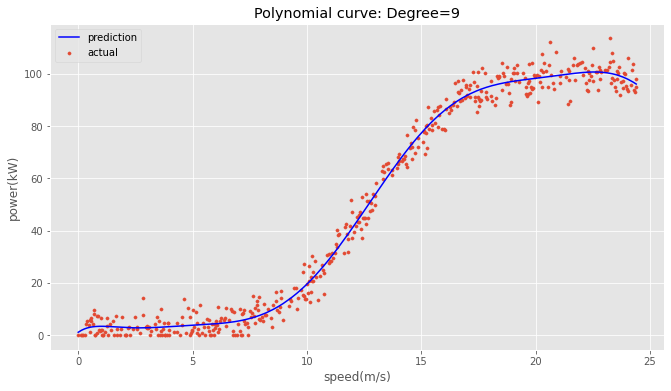

In [39]:
# Plot curve 
plt.scatter(pp_updated.speed, pp_updated.power, label='actual', s=10)
plt.plot(pp_updated.speed, poly_predict(pp_updated.speed), color='b', label='prediction')

plt.title('Polynomial curve: Degree=9')
plt.xlabel('speed(m/s)')
plt.ylabel('power(kW)')
plt.legend() 

It is clear from visualising the fitted curve that a polynomial regression builds a better predictive model than simple linear regression. We can calculate the R-squared value and compare it with those calculated above. We will need to import the `r2_score` function from the `sklearn.metrics` module for the polynomial model [23]. `scikit-learn` is a machine learning library for the Python programming language which includes numerous machine learning algorithms as well as various associated tools for evaluation, data preparation etc. [24]: 

In [41]:
# Import r-squared function
from sklearn.metrics import r2_score

# print r-squared value
print('Polynomial R-squared: ', r2_score(pp_updated.power, poly_predict(pp_updated.speed))) 

Polynomial R-squared:  0.9905646789482405


The polynomial regression model yields an R-squared value of **~0.99**. This indicates that it is more accurate than the simple linear regression model created above, which had an R-squared value of **0.90**. 

<br>

##### end section

<br>



## 4. Train-test split

***

Until now, I have used the entire data set to train and test each of the predictive models above. When evaluating the models, the coefficient of determination was calculated. As noted, this is a statistical method which gives us a good indication as to their performance. The polynomial regression model yielded an R-squared score of **~0.99**. Given that the maximum score is 1, we might conclude that it is almost 100% accurate. However, having used the same data to train and test the model, the evaluation cannot be considered to have been truly unbiased. 

To minimise the potential for bias in building a supervised machine learning model, it is common practice to use the *train-test-split procedure*. This involves splitting the data into *train* and *test* subsets. As the names suggest, the train subset is used to train the model while the test subset is held back and used to test the model. It is quite a straight forward idea: the trained model is tested using data which it has not seen before. Given the random nature of real-world data, this makes intuitive sense as the goal of any predictive model is to make accurate predictions based on new input data. [25]

#### 4.1 `train_test_split()` with `scikit_learn`

`scikit-learn` provides the `train_test_split()` function which allows us to easily perform the procedure. The main configuration parameter is the *test_size* (or *train_size*) parameter, which enables us specify the size of the subsets into which we split the data [26]. Common split percentages are:
* 80% Train; 20% Test
* 67% Train; 33% Test
* 50% Train; 50% Test [27]

The data points for each subset are randomly allocated. Each time the function is called, the subsets will be populated with different combinations of observations. It is common practice to set the *random_state* parameter to some integer value. This sets a seed, thereby generating subsets with the same data each time the code is run. This is useful when comparing models as we know the data being used to train and test separate models is the exact same. Below, I call the function, dividing the data using a 50-50 split and setting the *random_state* parameter to 0. I output the length of each subset to verify the percentage split:

In [92]:
# Import function from model_selection module
from sklearn.model_selection import train_test_split

# Call train_test_split function with test size = 50%
x_train, x_test, y_train, y_test = train_test_split(pp_clean.speed, pp_clean.power, test_size=.20, random_state=10)

# Length of each subset
len(x_train), len(x_test), len(y_train), len(y_test)

(388, 98, 388, 98)

Now, we can use the same code above to train new models with the training data. These models will then be tested using the testing data:

In [93]:
# Call polyfit passing speed and power as parameters
coeffs3 = np.polyfit(x_train, y_train, 1)

# Pass coeffs to the poly1d function
predict3 = np.poly1d(coeffs3)

# Output predicted power 
predict3(x_test)

array([ 23.94357603,  70.34603569,  42.39340969,  41.15535047,
        87.14512372,  81.49957367, 105.45739524, 110.27757248,
        99.81184519,  92.37798737,  57.67931423,  -6.4906709 ,
        30.27693677,  89.76430679,  91.96530096,  66.90147981,
        49.68970538,  14.71590796,  33.99111444,  41.29291261,
        24.35626244,  23.66845176,  65.25073418,  26.55725662,
        -5.52773595,  71.72165705,  15.54128078,   5.76336416,
        14.02809728,  52.03376417, 101.33053117,  61.11836762,
        13.3402866 ,  91.27749028, 110.69025889,  91.82773883,
        44.45684173, -12.27378309,  67.31416622,  22.9751386 ,
        55.74794184, 116.19824681,  65.66342059,  92.92823591,
        27.24506729,  11.95916276,  25.59432166,  37.71079459,
        26.28213234,   1.36137582, -15.4432147 ,  14.99103223,
         8.38254723,  81.36201153,  25.04407312,  96.37279179,
        56.57881714, 112.07138274,  55.33525543,  22.28732792,
        44.31927959,  37.98591886,  10.72110354,  75.16

In [94]:
# print r-squared value
print('R-squared: ', r2_score(y_test, predict3(x_test))) 

R-squared:  0.897082898514826


In [95]:
# Call polyfit with degree = 9
poly_coeffs3 = np.polyfit(x_train, y_train, deg=9)

# Use poly1d to estimate unknown values
poly_predict3 = np.poly1d(poly_coeffs3)

print('R-squared: ', r2_score(y_test, poly_predict3(x_test))) 

R-squared:  0.9904531637483842


In [96]:
poly_predict3(x_test)

array([  6.62878263,  86.34186014,  28.4858401 ,  26.09772316,
        97.53937645,  95.73928787, 100.66942477, 100.02172035,
        99.93641374,  98.55080686,  63.05033717,   3.08015876,
        10.79564702,  98.07687576,  98.47727518,  81.27214849,
        44.40692624,   4.54927275,  14.80795545,  26.35736154,
         6.81188306,   6.51256814,  78.47051194,   7.98048304,
         3.05030529,  88.06454074,   4.63443849,   3.78079623,
         4.48467195,  49.91155154, 100.20629672,  70.51004176,
         4.42439836,  98.3542608 ,  99.87081522,  98.45273852,
        32.70453042,   3.30447596,  81.93573735,   6.23964652,
        58.63227609,  95.84880862,  79.19262442,  98.64891654,
         8.4172775 ,   4.3114841 ,   7.42778999,  20.1014302 ,
         7.81570496,   3.34765886,   2.61364837,   4.57662758,
         4.02173288,  95.67808837,   7.14136629,  99.28117649,
        60.5481039 ,  99.22699778,  57.67371539,   5.99566989,
        32.41477992,  20.54301439,   4.21372209,  91.63

In [ ]:
'''
function to find random seed which produces the highest r-squared value
'''
def best_seed():
    scores = []
    for i in range(10000):
        X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.1, random_state=i)
        reg.fit(X_Train, Y_Train)
        scores.append(reg.score(X_Test, Y_Test))
    return scores        

In [ ]:
scores = best_seed()

In [ ]:
min(scores)

In [ ]:
max(scores)

In [ ]:
scores.index(0.9306242340561958)

### References

[1] w3schools.com; Numpy Introduction; https://www.w3schools.com/python/numpy_intro.asp <br>
[2] w3schools.com; Pandas Tutorial https://www.w3schools.com/python/pandas_tutorial.asp <br>
[3] w3schools.com; Matplotlib Pyplot; https://www.w3schools.com/python/matplotlib_pyplot.asp <br>
[1] yale.edu; Linear Regression; http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm <br>
[2] yale.edu; Correlation; http://www.stat.yale.edu/Courses/1997-98/101/correl.htm <br>
[3] youtube.com; Wind Turbine Power Curve description; https://www.youtube.com/watch?v=8tNOL4ZL9Do <br>
[4] statisticshowto.com; Linear Regression: Simple Steps, Video. Find Equation, Coefficient, Slope; https://www.statisticshowto.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/ <br>
[1] Wikipedia; Regression analysis; https://en.wikipedia.org/wiki/Regression_analysis<br>
[2] Malil, F; How Good is My Predictive Model - Regression Analysis; https://medium.com/fintechexplained/part-3-regression-analysis-bcfe15a12866 <br>
[3] Frost, J; Choosing the Correct Type of Regression Analysis; https://statisticsbyjim.com/regression/choosing-regression-analysis/ <br>
[4] Brownlee, J; How to Calculate Correlation Between Variables in Python https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/ <br>
[5] Raschka, S.; https://github.com/rasbt/pattern_classification/blob/master/resources/latex_equations.md#correlation---pearson <br>
[6] kite.com; How to calculate R squared with NumPy in Python; https://www.kite.com/python/answers/how-to-calculate-r-squared-with-numpy-in-python <br>
[7] andrews.edu; Correlation Coefficients; https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm <br>
[8] Mester, T.; Linear Regression in Python using numpy + polyfit (with code base); https://data36.com/linear-regression-in-python-numpy-polyfit/ <br>
[9] numpy.org; numpy.polyfit; https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html <br>
[10] Mester, T.; Linear Regression in Python using numpy + polyfit (with code base); https://data36.com/linear-regression-in-python-numpy-polyfit/ <br>
[11] datatechnotes.com; Regression Model Accuracy (MAE, MSE, RMSE, R-squared) Check in R; https://www.datatechnotes.com/2019/02/regression-model-accuracy-mae-mse-rmse.html <br>
[12] Frost, J; How To Interpret R-squared in Regression Analysis; https://statisticsbyjim.com/regression/interpret-r-squared-regression/ <br>
[13] datatechnotes.com; Regression Model Accuracy (MAE, MSE, RMSE, R-squared) Check in R; https://www.datatechnotes.com/2019/02/regression-model-accuracy-mae-mse-rmse.html <br>
[14] Frost, J; How To Interpret R-squared in Regression Analysis; https://statisticsbyjim.com/regression/interpret-r-squared-regression/ <br>
[15] Brownlee, J; How to Remove Outliers for Machine Learning; https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/ <br>
[16] Detecting And Treating Outliers In Python — Part 2; https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-2-3a3319ec2c33 <br>
[17] Pei, S. and Li, P., 2019; Wind Turbine Power Curve Modeling with a Hybrid Machine Learning Technique; https://www.researchgate.net/publication/337325612_Wind_Turbine_Power_Curve_Modeling_with_a_Hybrid_Machine_Learning_Technique <br>
[18] Detecting And Treating Outliers In Python — Part 2; https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-2-3a3319ec2c33 <br>
[19] Brownlee, J; How to Remove Outliers for Machine Learning; https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/ <br>
[20] McLouglin, I.; https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/fitting-lines.ipynb <br>
[21] Brownlee, J.; Curve Fitting With Python; https://machinelearningmastery.com/curve-fitting-with-python/ <br>
[22] drque.net; Polynomial Regression; http://polynomialregression.drque.net/math.html <br>
[23] data36.com; Linear Regression in Python using numpy + polyfit (with code base); https://data36.com/linear-regression-in-python-numpy-polyfit/ <br>
[24] scikit-learn.org; https://scikit-learn.org/stable/ <br>
[25] Split Your Dataset With scikit-learn's train_test_split(); https://realpython.com/train-test-split-python-data/ <br>
[26] Brownlee, J; Train-Test Split for Evaluating Machine Learning Algorithms; https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/ <br>
[27] *Ibid* <br>